In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from SharedX import ShareXaxis
from UniversalColor import UniversalColor
from legend_shadow import legend_shadow
from scipy.io import readsav
import spiceypy as spice

import os

UC = UniversalColor()
UC.set_palette()

In [2]:
target = 'Ganymede'

RJ = 71492*1E+3     # [m]

In [3]:
spice.furnsh('/Users/shin/Documents/Research/Jupiter/Codes/HST/kernel/cassMetaK.txt')

In [4]:
# Moon's position seen from Jupiter in IAU_JUPITER coordinate.
et = spice.str2et('2022-01-01T00:00:00')
pos, _ = spice.spkpos(
    targ=target, et=et, ref='IAU_JUPITER', abcorr='none', obs='JUPITER'
)

print(pos/(RJ/1000))
print(math.sqrt(pos[0]**2+pos[1]**2)/(RJ/1000))

[  9.83179173 -11.26199972  -0.03344621]
14.949808237422891


In [5]:
r_arr = np.zeros(30)
z_arr = np.zeros(30)
for i in range(30):
    day = str(i+1).zfill(2)
    et = spice.str2et('2022-01-'+day+'T00:00:00')
    pos, _ = spice.spkpos(
        targ=target, et=et, ref='IAU_JUPITER', abcorr='none', obs='JUPITER'
    )

    z_arr[i] = pos[2]/(RJ/1000)
    r_arr[i] = math.sqrt(pos[0]**2+pos[1]**2)/(RJ/1000)


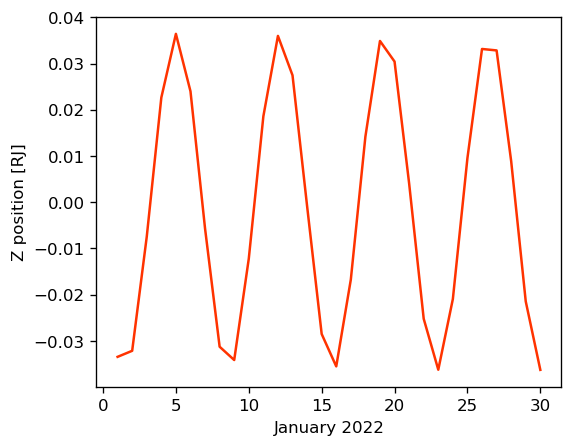

In [6]:
fig, ax = plt.subplots(figsize=(5,4), dpi=120)
ax.set_xlabel('January 2022')
ax.set_ylabel('Z position [RJ]')
ax.plot(np.arange(1,30+1,1), z_arr)

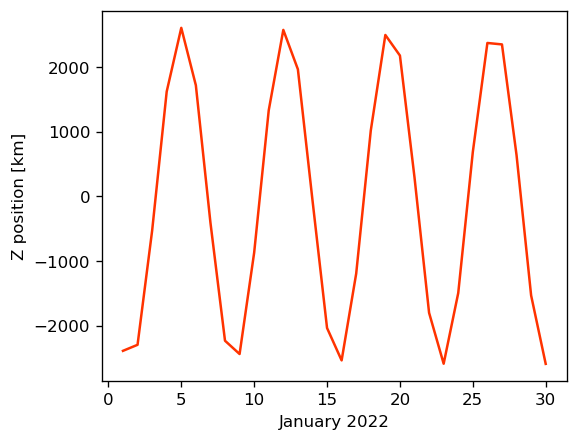

In [7]:
fig, ax = plt.subplots(figsize=(5,4), dpi=120)
ax.set_xlabel('January 2022')
ax.set_ylabel('Z position [km]')
ax.plot(np.arange(1,30+1,1), z_arr*RJ/1000)

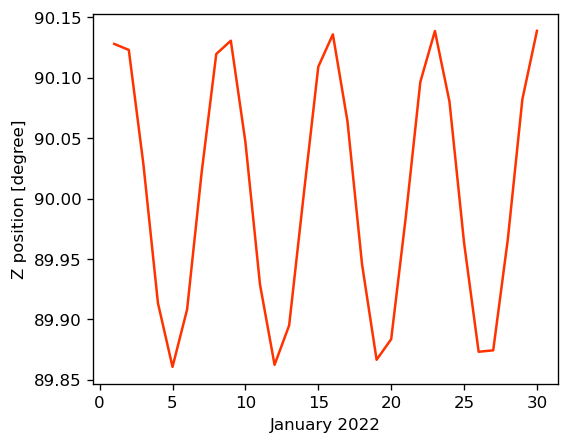

In [8]:
fig, ax = plt.subplots(figsize=(5,4), dpi=120)
ax.set_xlabel('January 2022')
ax.set_ylabel('Z position [degree]')
ax.plot(np.arange(1,30+1,1), np.degrees(np.arccos(z_arr/14.97)))

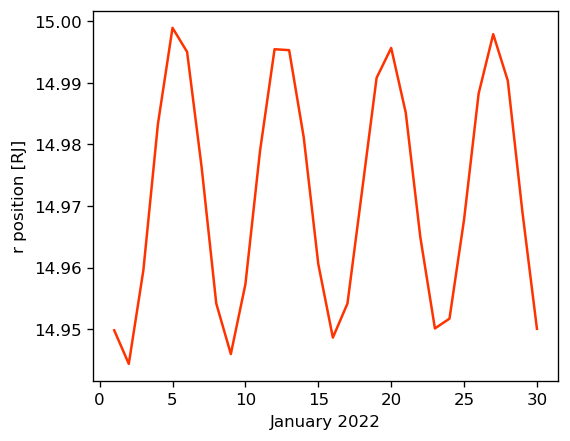

In [9]:
fig, ax = plt.subplots(figsize=(5,4), dpi=120)
ax.set_xlabel('January 2022')
ax.set_ylabel('r position [RJ]')
ax.plot(np.arange(1,30+1,1), r_arr)